In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
# from mesa import Agent, Model
from MoneyModel import MoneyModel, batchrunner
import numpy as np


In [2]:
# empty_model = MoneyModel(10)
# empty_model.step()

In [3]:
all_wealth = []

for j in range(100):
    
    model = MoneyModel(50, 10, 10)
    for i in range(10):
        model.step()
        
    for agent in model.schedule.agents:
        all_wealth.append(agent.wealth)

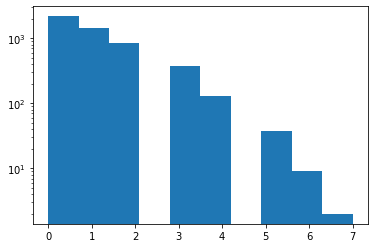

In [4]:
# agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(all_wealth)
plt.yscale('log')

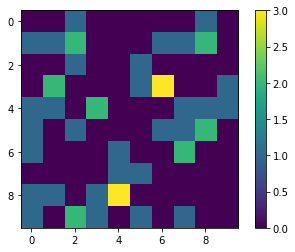

In [5]:

agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()

In [6]:
gini = model.datacollector.get_model_vars_dataframe()


<AxesSubplot:>

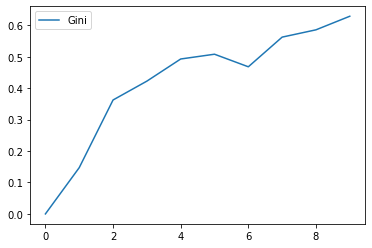

In [7]:
gini.plot()

In [8]:
fixed_params = {
    "width": 10,
    "height": 10
}

variable_params = {"N": range(10, 500, 10)}

# # The variables parameters will be invoke along with the fixed parameters allowing for either or both to be honored.
# batch_run = BatchRunner(
#     MoneyModel,
#     variable_params,
#     fixed_params,
#     iterations=5,
#     max_steps=100,
#     model_reporters={"Gini": compute_gini}
# )

batch_run = batchrunner(
    MoneyModel,
    variable_params,
    fixed_params,
    iterations=5,
    max_steps=100,
#     model_reporters={"Gini": compute_gini}
)

batch_run.run_all()

245it [01:11,  3.41it/s]


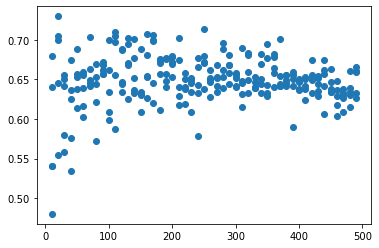

In [12]:
run_data = batch_run.get_model_vars_dataframe()
run_data.head()
plt.scatter(run_data.N, run_data.gini)

In [10]:
run_data

,N,Run,gini,width,height
0,10,0,0.480000,10,10
1,10,1,0.640000,10,10
2,10,2,0.540000,10,10
3,10,3,0.680000,10,10
4,10,4,0.540000,10,10
...,...,...,...,...,...
240,490,240,0.632720,10,10
241,490,241,0.659092,10,10
242,490,242,0.626014,10,10
243,490,243,0.660616,10,10
